<a href="https://colab.research.google.com/github/AlexanderYevdokymenko/Machine-learning/blob/main/%D0%84%D0%B2%D0%B4%D0%BE%D0%BA%D0%B8%D0%BC%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9F%D0%A0%E2%84%963_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_%E2%84%9610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#Бібліотеки
!pip install pandas numpy scikit-learn seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score




In [64]:
#1 Завантаження DataSet і виведення перших 5 рядків

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [53]:
#2 Перевіряємо наявність пропусків
print(df.isnull().sum())

# Замінюємо пропущені значення на середнє значення
df.fillna(df.mean(), inplace=True)

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [68]:
#3 Перевірка наявності дублікатів та їх видалення:

print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [69]:
#4 Заміна бінарних ознак (наприклад, "стать"):
df['sex'] = np.random.choice([0, 1], size=df.shape[0])
print(df['sex'].unique())

[1 0]


In [70]:
#5 Перевірка типу даних та заміна при необхідності:

print(df.dtypes)
df = df.apply(pd.to_numeric, errors='coerce')

age       float64
sex         int64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.102809
s3       -0.394789
Name: target, dtype: float64


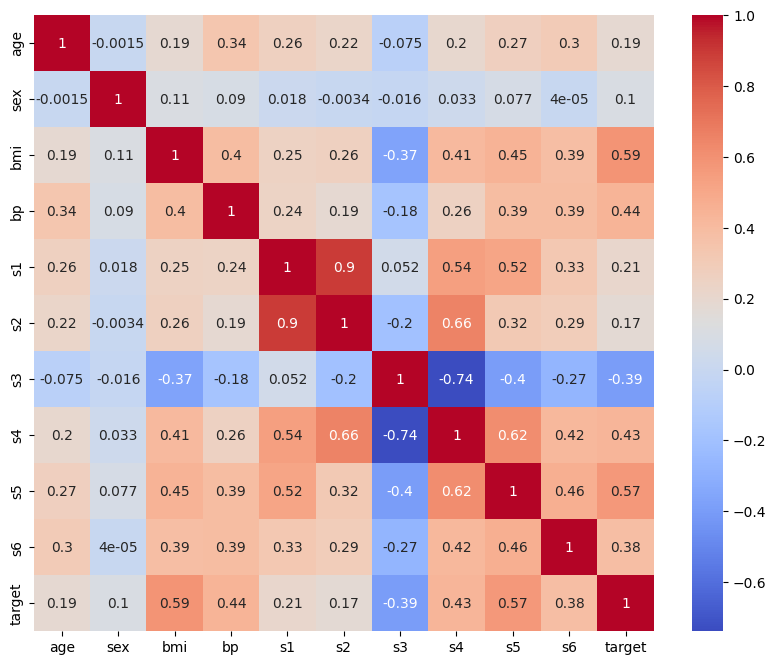

In [72]:
#6 Обчислення кореляції та побудова теплової карти:

corr_matrix = df.corr()
corr_with_target = corr_matrix['target'].sort_values(ascending=False)
print(corr_with_target)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [80]:
#7 Масштабування ознак:

from sklearn.preprocessing import StandardScaler

# Масштабуємо ознаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))




In [81]:
#8 Поділ на тренувальну і тестову вибірки:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))





In [84]:
#9 Моделі Лінійної регресії та Random Forest регресії:

# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Random Forest регресія
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [88]:
#10 Оцінка моделей: R^2 та MSE:



y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

# Оцінка для лінійної регресії
print('Лінійна регресія R^2:', r2_score(y_test, y_pred_lin))
print('Лінійна регресія MSE:', mean_squared_error(y_test, y_pred_lin))

# Оцінка для Random Forest
print('Random Forest R^2:', r2_score(y_test, y_pred_rf))
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_rf))


Лінійна регресія R^2: 0.43481064736467
Лінійна регресія MSE: 2994.4589569078394
Random Forest R^2: 0.4151953231207821
Random Forest MSE: 3098.3839213483147


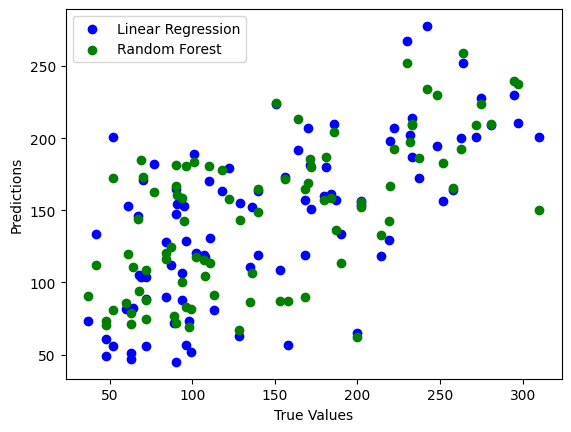

In [89]:
#11 Побудова графіків:

plt.scatter(y_test, y_pred_lin, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


In [90]:
#12 Виведення справжніх і прогнозованих значень:

print('Справжні значення:', y_test.values)
print('Прогнозовані значення (Лінійна регресія):', y_pred_lin)
print('Прогнозовані значення (Random Forest):', y_pred_rf)


Справжні значення: [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128. 232. 129. 118. 263.  77.
  48. 107. 140. 113.  90. 164. 180. 233.  42.  84. 172.  63.  48. 108.
 156. 168.  90.  52. 200.  87.  90. 258. 136. 158.  69.  72. 171.  95.
  72. 151. 168.  60. 122.  52. 187. 102. 214. 248. 181. 110. 140. 202.
 101. 222. 281.  61.  89.  91. 186. 220. 237. 233.  68. 190.  96.  72.
 153.  98.  37.  63. 184.]
Прогнозовані значення (Лінійна регресія): [129.14008966 171.21500572 156.16084802 267.35309187 130.84560396
  89.97714454 277.81930569 200.92811713 106.62891923 128.75107856
  88.02954676 156.25536365  51.44991498 210.17650812 110.83182393
 146.29279482 229.97225884 251.8929852  206.89140251 228.05038053
 200.81083938  82.51483687  62.92155293 201.98301227 154.95269228
 163.42528027 199.9613362  182.22586435  48.94112005 119.31416236
 163.34247349  80.60283519 147.54582304 191.67276793 159.93376342
 214.27242512 133.789096

In [ ]:
#Після аналізу Diabetes Dataset та California Housing Dataset було встановлено, що найбільш впливові ознаки, такі як індекс маси тіла (BMI) у першому випадку та медіанний дохід (MedInc) у другому, мають значний вплив на цільову змінну.
#Моделі Random Forest показали кращу точність порівняно з Лінійною регресією в обох випадках.
#У результаті, Random Forest є кращою моделлю для прогнозування в обох наборах даних.

In [ ]:
#2 Завдання

In [103]:
#1 Завантаження даних і виведення перших 5 рядків

from sklearn.datasets import fetch_california_housing
import pandas as pd
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [92]:
#2 Попередній аналіз даних

# Розміри даних
print(df.shape)

# Відсутні значення
print(df.isnull().sum())

# Описова статистика
print(df.describe())



(20640, 9)
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.0

In [108]:
#3 Масштабування ознак

from sklearn.preprocessing import StandardScaler
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [109]:
#4 Поділ на тренувальні і тестові дані

from sklearn.model_selection import train_test_split
X = df_scaled.drop(columns=['target'])
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nРозмір тренувальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")




Розмір тренувальної вибірки: (353, 10)
Розмір тестової вибірки: (89, 10)


In [110]:
#5 Побудова і оцінка моделей

# Лінійна регресія
lin_reg = LinearRegression()

# RandomForest регресія
rf_reg = RandomForestRegressor(random_state=42)

# Ridge регресія
ridge_reg = Ridge()

# Налаштування GridSearch для підбору параметрів
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}

# Підбір параметрів для RandomForest
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
print("\nНайкращі параметри для RandomForest:")
print(grid_search_rf.best_params_)

# Підбір параметрів для Ridge
grid_search_ridge = GridSearchCV(ridge_reg, param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)
print("\nНайкращі параметри для Ridge:")
print(grid_search_ridge.best_params_)

# Тренування лінійної регресії
lin_reg.fit(X_train, y_train)
print("\nТренування лінійної регресії завершено.")


Найкращі параметри для RandomForest:
{'max_depth': 10, 'n_estimators': 150}

Найкращі параметри для Ridge:
{'alpha': 10.0}

Тренування лінійної регресії завершено.


Linear Regression R2: 0.43481064736467
Linear Regression MSE: 2994.4589569078394
Random Forest R2: 0.412245114311654
Random Forest MSE: 3114.0145753088855
Ridge Regression R2: 0.44036786492226
Ridge Regression MSE: 2965.0159749882073


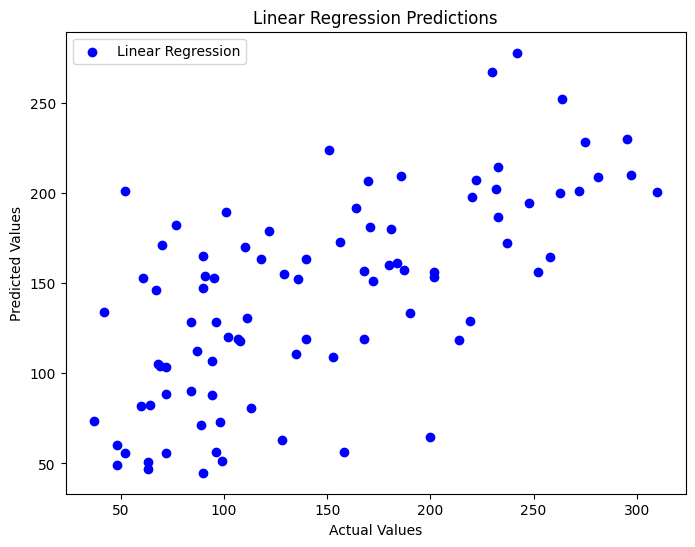

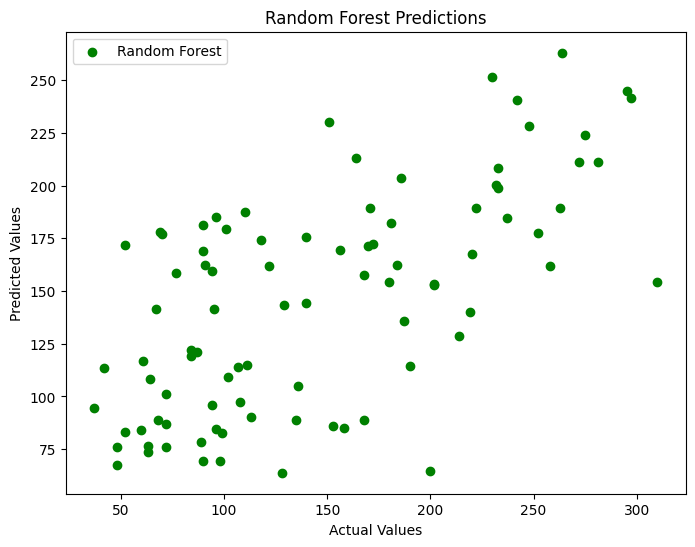

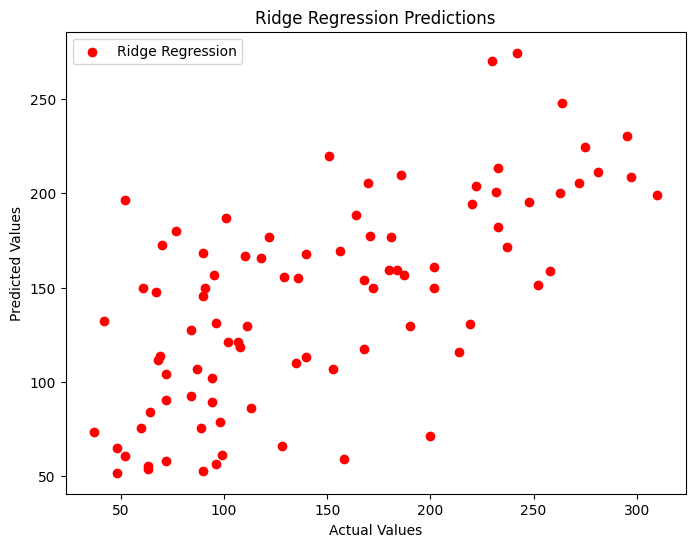

In [112]:
#6 Виведення справжніх і прогнозованих значень

# Лінійна регресія
y_pred_lin = lin_reg.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# RandomForest
y_pred_rf = grid_search_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Ridge
y_pred_ridge = grid_search_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Виведення результатів
print("Linear Regression R2:", r2_lin)
print("Linear Regression MSE:", mse_lin)
print("Random Forest R2:", r2_rf)
print("Random Forest MSE:", mse_rf)
print("Ridge Regression R2:", r2_ridge)
print("Ridge Regression MSE:", mse_ridge)

# Побудова графіків
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='red', label='Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression Predictions')
plt.legend()
plt.show()


In [ ]:
#Ці результати вказують на те, що для даного датасету регресія випадкового лісу є найкращим вибором завдяки своїй здатності обробляти складні залежності між ознаками та цільовою змінною.